<a href="https://colab.research.google.com/github/DJLee68/MachineLearningProject/blob/master/Assignment02/20154652%EC%9D%B4%EB%8F%99%EC%9E%AC_assignment_02_assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [72]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [73]:
# import data with numpy
data = np.loadtxt('profit_population.txt', delimiter=',')


## 2. Explore the dataset distribution
<hr>

Plot the training data points.

Text(0.5, 1.0, 'Training data')

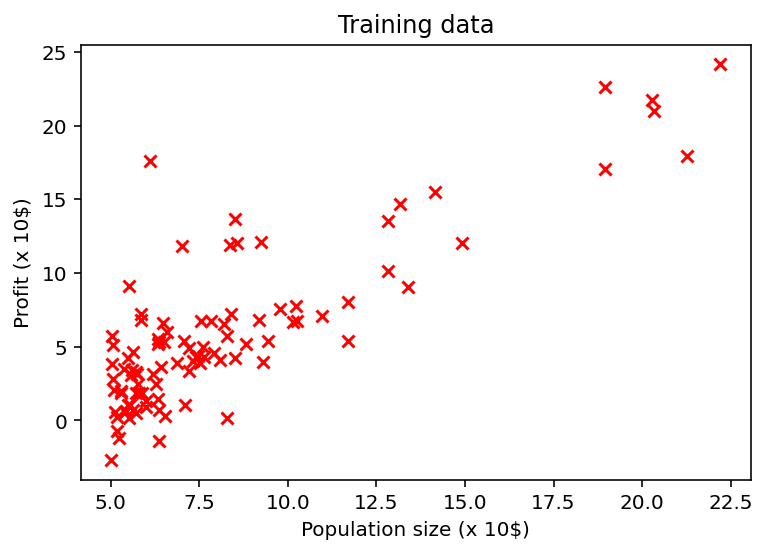

In [74]:
x_train = data[:,0]
y_train = data[:,1]

plt.scatter(x_train, y_train, c='red', marker='x')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10$)')
plt.title('Training data')

In [75]:
x_train.shape

(97,)

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [168]:
# construct data matrix
X = np.hstack((np.ones((len(x_train), 1)), x_train.reshape(len(x_train), 1)))

# parameters vector
w = np.array([
  [4],
  [2]
])

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X,w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)

## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [169]:
# loss function definition
def loss_mse(y_pred,y): 
  
    diff = y_pred - y.reshape(len(y), 1)
    loss = np.dot(diff.T, diff) / len(y)
    
    return loss


# Test loss function 
y = y_train# label 
y_pred = f_pred(X,w)# prediction

loss = loss_mse(y_pred,y)
print(loss)
print(loss.shape)

[[228.28955965]]
(1, 1)


## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [170]:
# gradient function definition
def grad_loss(y_pred,y,X):

    diff = y_pred - y.reshape(len(y), 1)
    loss = np.dot(diff.T, diff) / len(y)
    grad = (np.dot(X.T, diff)*2) / len(y)
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)
print(grad)
print(grad.shape)

[[ 28.9609299]
 [260.2364718]]
(2, 1)


## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.0017495155334472656
19.10138329043063
[[3.56684947]
 [0.4433315 ]]


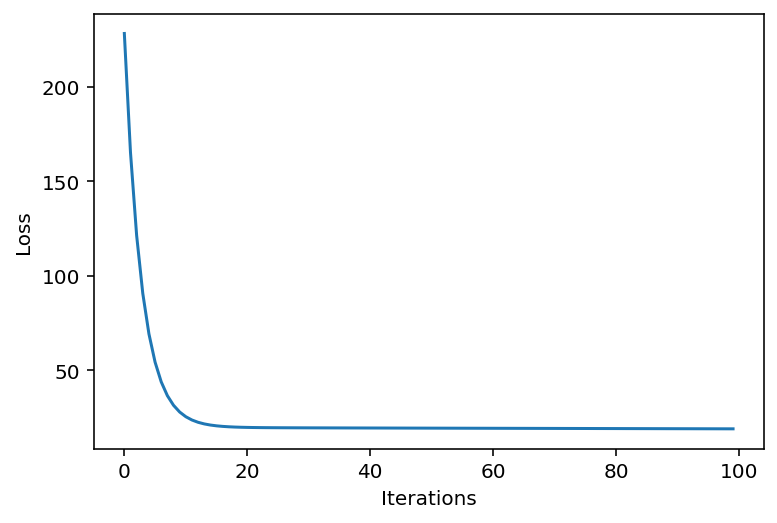

In [171]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = np.zeros(max_iter)# record the loss values
    w_iters = np.zeros((max_iter, w_init.shape[0], w_init.shape[1]))# record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w)# linear predicition function
        grad_f = grad_loss(y_pred, y, X)# gradient of the loss 
        w = w - tau*grad_f# update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred, y)# save the current loss value 
        w_iters[i,:] = w# save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = w
tau = 0.001
max_iter = 100

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1]) # plot the last value of the loss
print(w_iters[-1]) # plot the last value of the parameter w 

# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

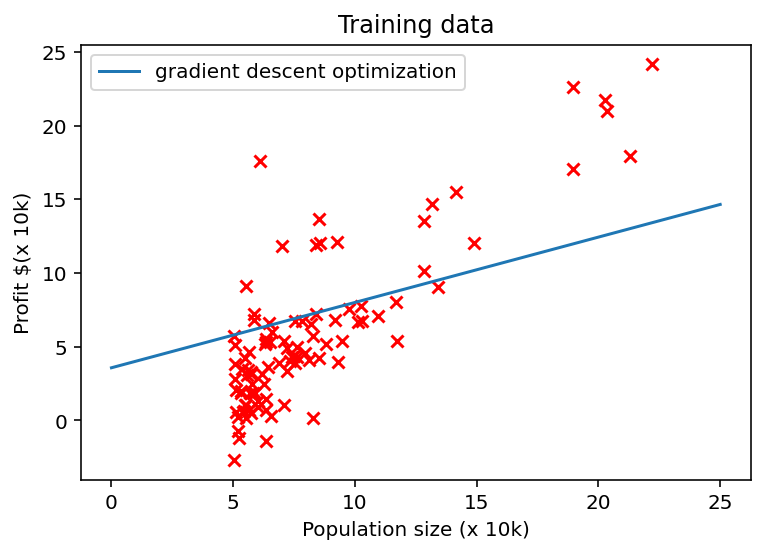

In [172]:
# linear regression model
x_pred = np.linspace(0,25,100) # define the domain of the prediction function
x_pred = np.hstack((np.ones((len(x_pred), 1)), x_pred.reshape(len(x_pred), 1)))
y_pred = f_pred(x_pred, w_iters[-1])# compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train, y_train, c='red', marker='x')
plt.plot(x_pred[:,1], y_pred, label='gradient descent optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.0006084442138671875
[[-3.89578088]
 [ 1.19303364]]
loss sklearn= [[8.95394275]]
loss gradient descent= 19.10138329043063


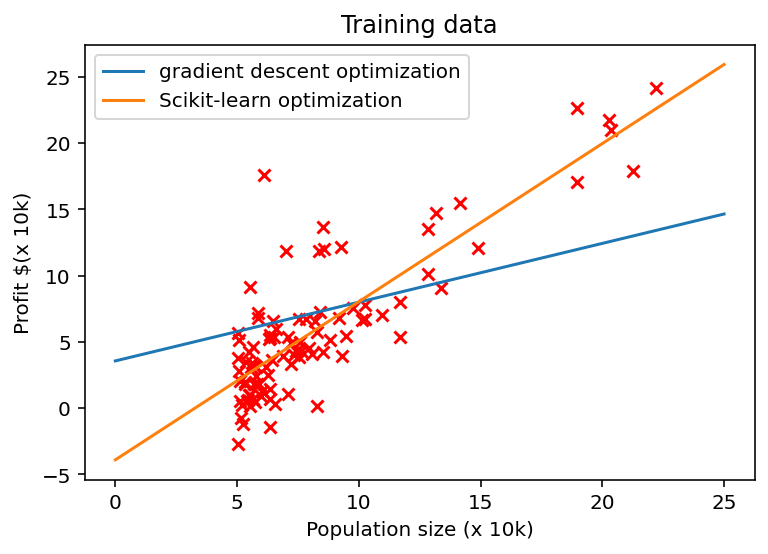

In [173]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train.reshape(len(x_train), 1), y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)
loss_sklearn = loss_mse(np.dot(X, w_sklearn), y_train) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
y_pred_sklearn = np.dot(x_pred, w_sklearn)# prediction obtained by the sklearn library

plt.figure(3)

plt.scatter(x_train, y_train, c='red', marker='x')
plt.plot(x_pred[:,1], y_pred, label='gradient descent optimization')
plt.plot(x_pred[:,1], y_pred_sklearn, label='Scikit-learn optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

In [201]:
# plot gradient descent 
def plot_gradient_descent(X,y,w_init,tau,max_iter):
    
    def f_pred(X,w):
        
        f = np.dot(X,w) 
        
        return f
    
    def loss_mse(y_pred,y):
        
        diff = y_pred - y.reshape(len(y), 1)
        loss = np.dot(diff.T, diff) / len(y)
        
        return loss

    # gradient descent function definition
    def grad_desc(X, y, w_init, tau, max_iter):

        L_iters = np.zeros(max_iter)# record the loss values
        w_iters = np.zeros((max_iter, w_init.shape[0], w_init.shape[1]))# record the parameter values
        w = w_init # initialization
        
        for i in range(max_iter): # loop over the iterations
            
            y_pred = f_pred(X, w)# linear predicition function
            grad_f = grad_loss(y_pred, y, X)# gradient of the loss 
            w = w - tau*grad_f# update rule of gradient descent 
            L_iters[i] = loss_mse(y_pred, y)# save the current loss value 
            w_iters[i,:] = w# save the current w value 
            
        return w, L_iters, w_iters

    # run gradient descent
    w, L_iters, w_iters = grad_desc(X, y, w_init, tau, max_iter)
    print(L_iters)
    print(w_iters.shape)
    # Create grid coordinates for plotting a range of L(w0,w1)-values
    B0 = np.linspace(-10, 10, 50)
    B1 = np.linspace(-1, 4, 50)
    
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))  
    # Calculate loss values based on L(w0,w1)-values
    for (i,j),v in np.ndenumerate(Z):
        tmp = np.array([xx[i,j], yy[i,j]])
        tmp = tmp.reshape(len(tmp), 1)
        Z[i,j] = loss_mse(np.dot(X, tmp), y)

    # 3D visualization
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
    ax1.scatter(w_init[0], w_init[1], c='r')
    ax1.plot(w_iters[:,0,0], w_iters[:,1,0])

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
    ax2.set_zlabel('Loss $L(w_0,w_1)$')
    ax2.set_zlim(Z.min(),Z.max())

    # plot gradient descent
    Z2 = np.zeros([max_iter])
    
    for i in range(max_iter):
        w0 = w_iters[i,0]
        w1 = w_iters[i,1]
        tmp_w = np.array([w0, w1])
        Z2[i] = loss_mse(np.dot(X, tmp_w), y)
        
    ax2.plot(w_iters[:,0,0], w_iters[:,1,0])
    ax2.scatter(w_init[0], w_init[1], c='b')

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$w_0$', fontsize=17)
        ax.set_ylabel(r'$w_1$', fontsize=17)
    

[9.53838634 9.40307303 9.34538572 ... 8.95394275 8.95394275 8.95394275]
(5000, 2, 1)


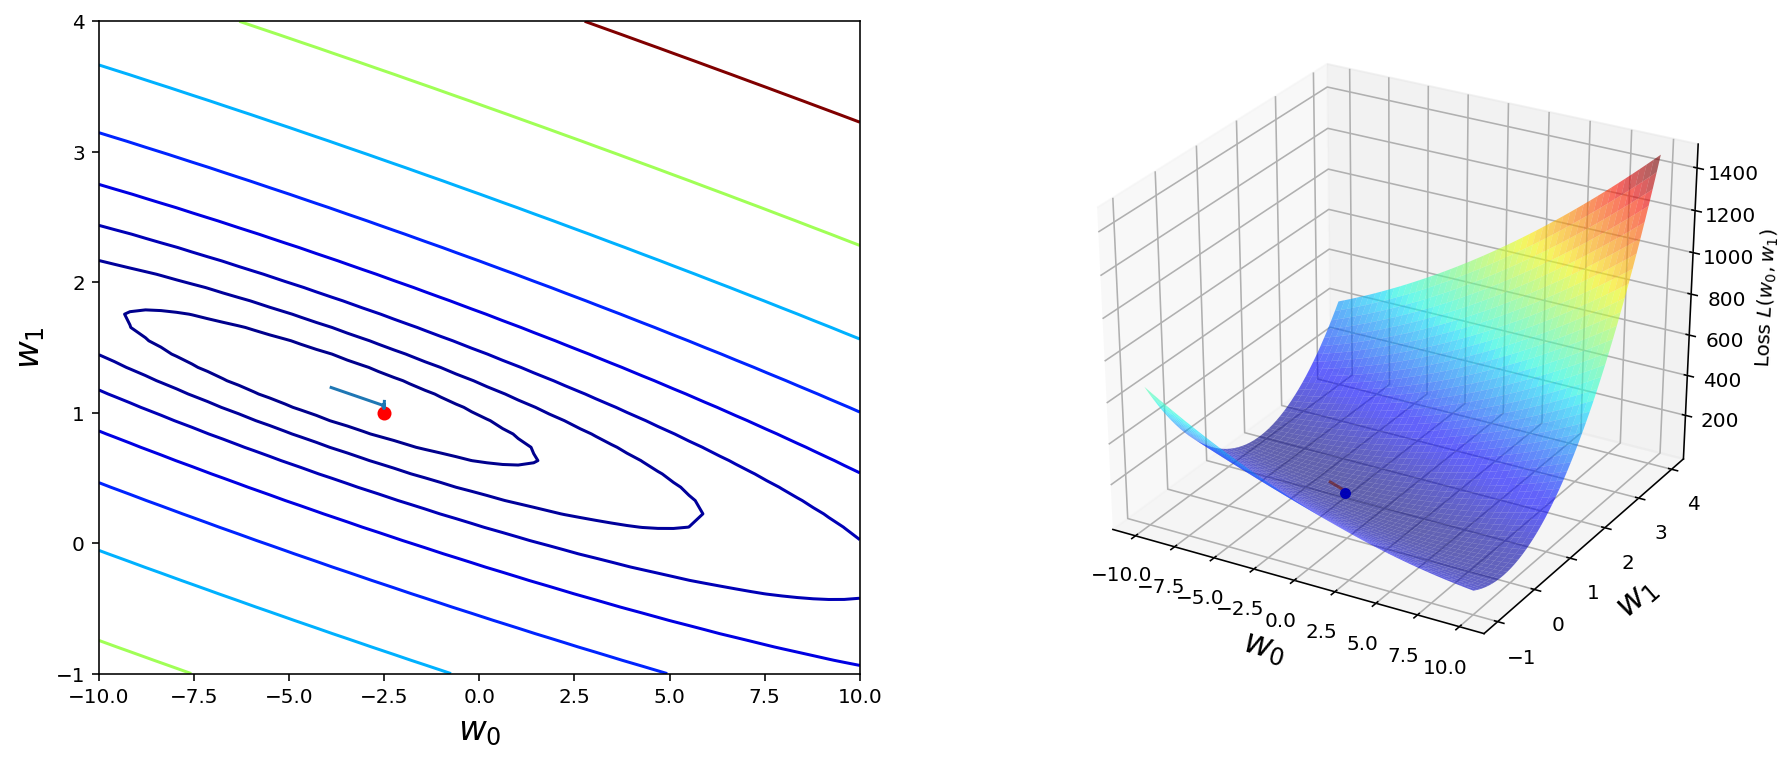

In [202]:
# run plot_gradient_descent function
w_init = np.array([
  [-2.5],
  [1]
])
tau = 0.01
max_iter = 5000

plot_gradient_descent(X,y,w_init,tau,max_iter) 

# Output results

## 1. Plot the training data (1pt)

Text(0.5, 1.0, 'Training data')

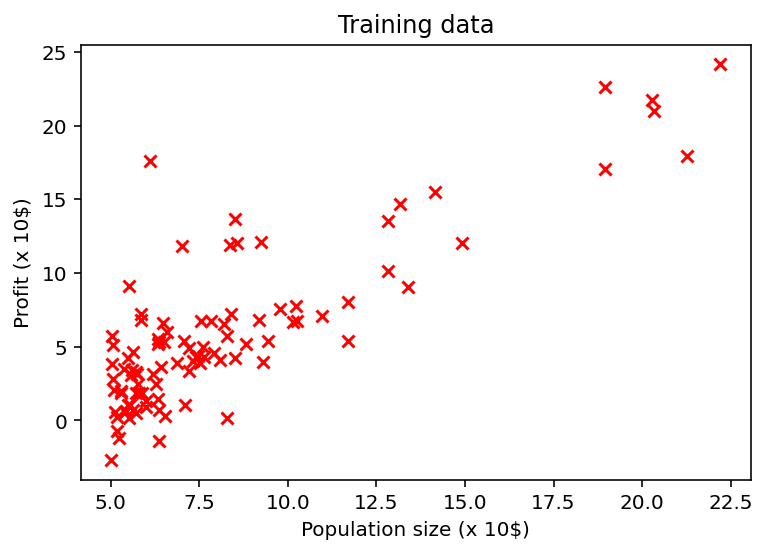

In [28]:
plt.scatter(x_train, y_train, c='red', marker='x')
plt.xlabel('Population size (x 10$)')
plt.ylabel('Profit (x 10$)')
plt.title('Training data')

## 2. Plot the loss curve in the course of gradient descent (2pt)

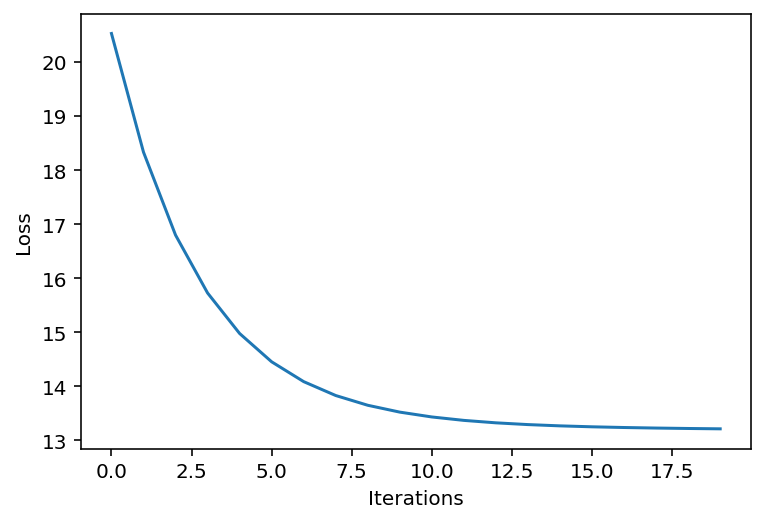

In [27]:
# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 3. Plot the prediction function superimposed on the training data (2pt)

No handles with labels found to put in legend.


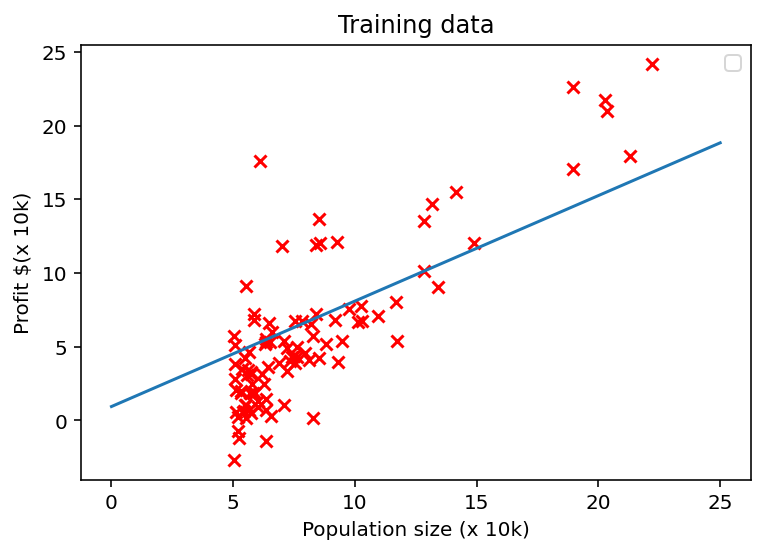

In [26]:
# plot
plt.figure(3)
plt.scatter(x_train, y_train, c='red', marker='x')
plt.plot(x_pred[:,1], y_pred)
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

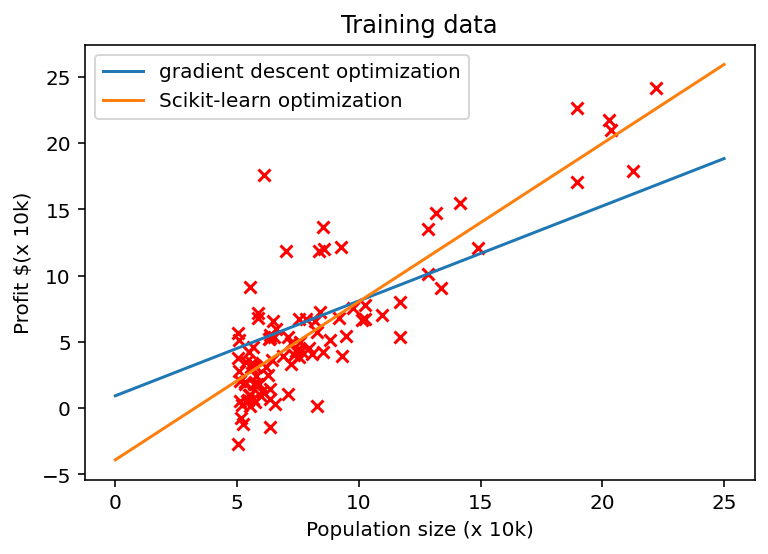

In [40]:
plt.figure(3)
plt.scatter(x_train, y_train, c='red', marker='x')
plt.plot(x_pred[:,1], y_pred, label='gradient descent optimization')
plt.plot(x_pred[:,1], y_pred_sklearn, label='Scikit-learn optimization')
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

[9.53838634 9.40307303 9.34538572 ... 8.95394275 8.95394275 8.95394275]
(5000, 2, 1)


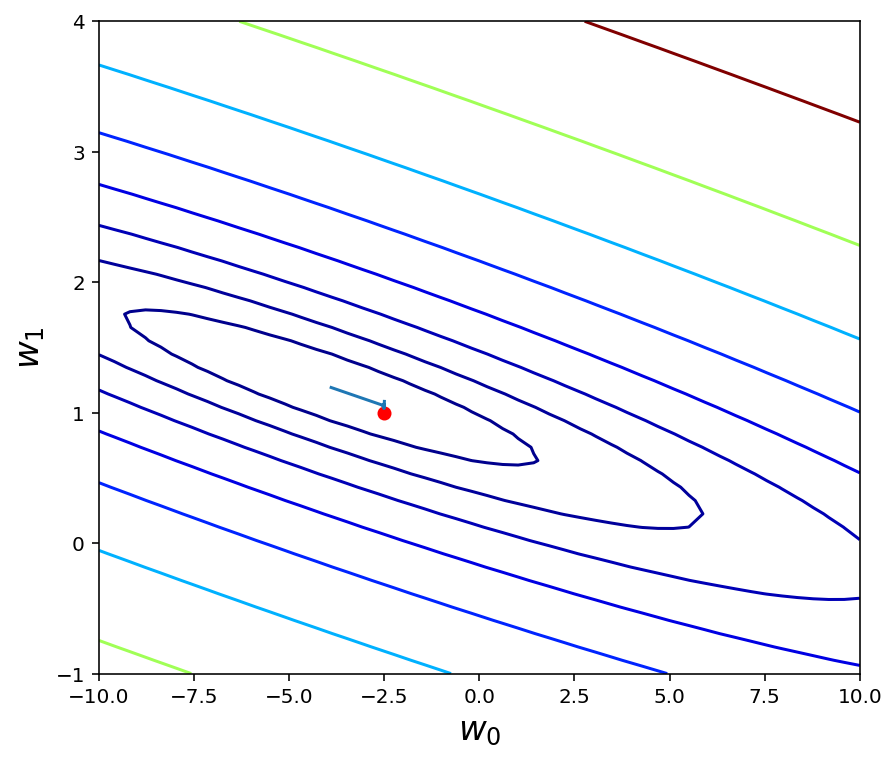

In [200]:
plot_gradient_descent(X,y,w_init,tau,max_iter) 

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

[9.53838634 9.40307303 9.34538572 ... 8.95394275 8.95394275 8.95394275]
(5000, 2, 1)


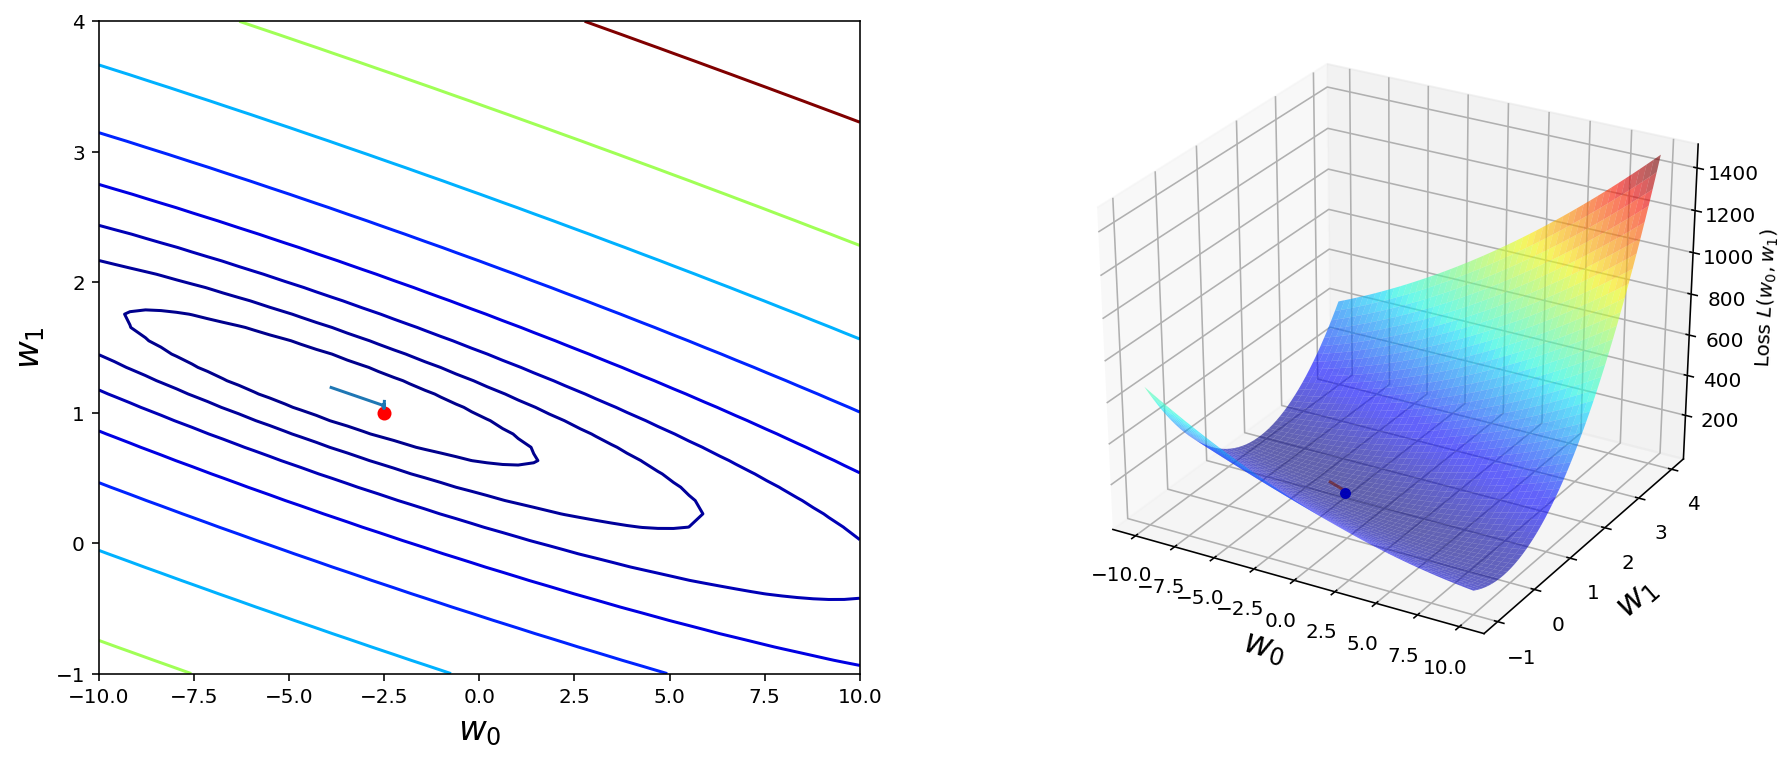

In [203]:
plot_gradient_descent(X,y,w_init,tau,max_iter) 